# Running GRASS in Jupyter Notebooks in Mac

> it will/should work with the [GRASS GIS for the Mac](http://grassmac.wikidot.com/) version" 

## Set Up
Similar to Linux on MacOS we can install jupyter lab with the system python and use grass jupyter without launching a grass session directly.


##### *1. Install Jupyter Lab*
Python on MacOS defaults to python2 so when we use python we need to explicitly call python3 and pip3 to make sure our package installs with the correct version. To install open *Terminal.App* or whatever terminal emulator you use, and run the following command

```bash
python3 -m pip install jupyterlab
```

##### *2. Starting jupyterlab*
To run jupyterlab we run the following the terminal
```
python3 -m jupyterlab
```
Remember MacOS defaults to python to be python2 so we need to explicitly call python3.


##### *3. Finding where grass lives*
> *This is not required but provides background information to how grass installs and works on MacOS, to get started right away you can instead refer to the start section*

Applications on MacOS install into `/Applications` as such in order to use grass from the CLI, we need to point to the executable. The executable lives at `/Applications/GRASS-versionnumber/Contents/Resources/bin/grass`. The version number will change with new releases, so we can automaticallty find it with either of the following commands

in `bash`
```bash
find /Applications -name 'GRASS*' -type d -maxdepth 1
```

in `python`
```python
from pathlib import Path
grass_call = list(Path("/Applications").glob("GRASS*"))[0] / "Contents" / "Resources" / "bin" / "grass"
```

## Start

When using Python in notebook, we usually find GRASS GIS Python packages, import them, initialize GRASS GIS session, and set several variables useful for using GRASS GIS in a notebook.

In [1]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
from IPython.display import Image
from pathlib import Path

# Ask GRASS GIS where its Python packages are.
# Get location of grass binary
grass_app = list(Path("/Applications").glob("GRASS*"))
print(f"GRASS version(s) found : {grass_app}")

# We choose the first version of grass available
grass_call = grass_app[0] / "Contents" / "Resources" / "bin" / "grass"
print(f"Using GRASS located @ {grass_call!s}")

GRASS version(s) found : [PosixPath('/Applications/GRASS-8.4.app')]
Using GRASS located @ /Applications/GRASS-8.4.app/Contents/Resources/bin/grass


In [2]:
grass_call = grass_app[0] / "Contents" / "Resources" / "bin" / "grass"
print(f"Using GRASS located @ {grass_call!s}")

Using GRASS located @ /Applications/GRASS-8.4.app/Contents/Resources/bin/grass


In [3]:
# Check python path
sys.path.append(subprocess.check_output([grass_call, "--config", "python_path"], text=True).strip())
print('success')


success


Default locale settings are missing. GRASS running with C locale.


In [4]:

print(sys.path)

['/Users/asumi/opt/anaconda3/envs/GIS714/lib/python312.zip', '/Users/asumi/opt/anaconda3/envs/GIS714/lib/python3.12', '/Users/asumi/opt/anaconda3/envs/GIS714/lib/python3.12/lib-dynload', '', '/Users/asumi/opt/anaconda3/envs/GIS714/lib/python3.12/site-packages', '/Applications/GRASS-8.4.app/Contents/Resources/etc/python']


In [5]:
os.getcwd()

'/Users/asumi/GitHub/GIS714-assignments/GRASS_GIS_Foundations'

In [8]:
# Import the GRASS GIS packages we need.
sys.path = ['', 
            '/Users/asumi/opt/anaconda3/lib/python38.zip',
              '/Users/asumi/opt/anaconda3/lib/python3.8', 
              '/Users/asumi/opt/anaconda3/lib/python3.8/lib-dynload', 
             '/Users/asumi/.local/lib/python3.8/site-packages', 
              '/Users/asumi/opt/anaconda3/lib/python3.8/site-packages',
                '/Users/asumi/opt/anaconda3/lib/python3.8/site-packages/aeosa',
                  '/Applications/GRASS-8.4.app/Contents/Resources/etc/python']
import grass.script as gs
    
import grass.jupyter as gj

# Create a GRASS GIS session.
gj.init("../data", "nc_spm_08_grass7", "user1")

## Using GRASS

Now that we have GRASS GIS running in our notebook, let's try some basic commands. 

In this section, we create an elevation map from the sample GRASS GIS dataset for North Carolina, USA. 

First, we set computational region.

In [9]:
# Set computational region to the study area.
gs.parse_command('g.region', raster="elevation", flags='pg')
# Set colors for elevation raster
gs.run_command('r.colors', map="elevation", color="elevation")

Then, we'll make our first map.

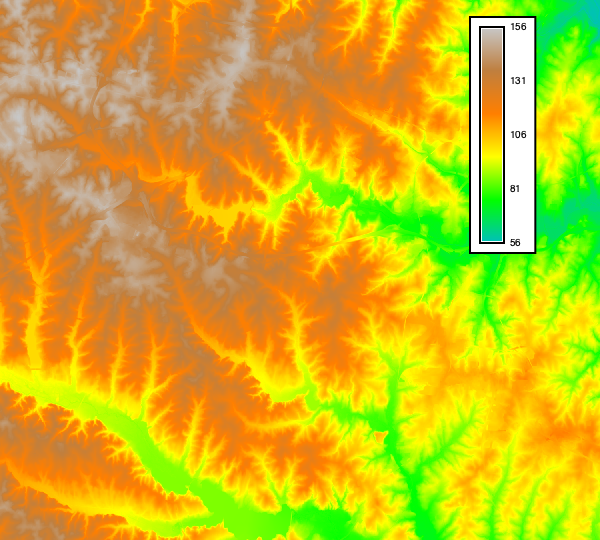

In [10]:
# Create GrassRenderer instance
img = gj.Map()
# Add a raster, vector and legend to the map
img.d_rast(map="elevation")
img.d_legend(raster="elevation", at=(55, 95, 80, 84), flags="b")
# Display map
img.show()

Now, we're up and running! 